# Ford GoBike Dataset
## by Sarumi Abdulkarim

## Introduction
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.
>
>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
>
>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline
pd.set_option('display.max_columns', 700)
sb.set_style('whitegrid')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford.shape

(183412, 16)

In [4]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning
Before investigating the dataset to draw conclusions, there are some quality issues that need to be sorted:

* There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
* Start/end times are not in the timestamp format
* The following columns are not in object format:
    start_station_id
    end_station_id
    bike_id
* Member birth is in the float format, but should be converted to integer format
* Member birthdates have a few inaccurate values

In [8]:
# Make a copy to clean the data
ford_polished = ford.copy()

**Define**

    Change the start and end times to datetime format.

**Code**

In [9]:
# Converting the start and end time to datetime format with pd.to_datetime
ford_polished['start_time'] = pd.to_datetime(ford_polished.start_time)
ford_polished['end_time'] = pd.to_datetime(ford_polished.end_time)

**Test**

In [10]:
ford_polished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

**Define** 

Conversion of several columns to their accurate formats with the use of `astype`:
* start_station_id, end_station_id, bike_id will be converted to `object` formats
* member_gender, user_type and bike_share_for_all_trip will be converted into the `category` formats

**Code**

In [11]:
# Changing several columns to the category type
ford_polished['user_type'] = ford_polished['user_type'].astype('category')
ford_polished['member_gender'] = ford_polished['member_gender'].astype('category')
ford_polished['bike_share_for_all_trip'] = ford_polished['bike_share_for_all_trip'].astype('category')

In [12]:
# Changing the following columns to the object type
ford_polished['start_station_id'] = ford_polished['start_station_id'].astype(str)
ford_polished['end_station_id'] = ford_polished['end_station_id'].astype(str)
ford_polished['bike_id']= ford_polished['bike_id'].astype(str)

**Test**

In [13]:
ford_polished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**Define**

 Get the member_age for all columns by subtracting the birth year from the current year and Change the format of the column
 
 **Code**

In [14]:
# Get the current year using the datetime function
current_year = datetime.date.today().year
ford_polished['member_age'] = current_year - ford_polished['member_birth_year']

In [15]:
ford_polished['member_age'].describe(percentiles=[.99])

count    175147.000000
mean         37.193563
std          10.116689
min          21.000000
50%          35.000000
99%          67.000000
max         144.000000
Name: member_age, dtype: float64

99% of the members are 67 and below, This shows that the data has a 1% outlier which we can remove now with the use of the `query` method.

In [16]:
ford_polished = ford_polished.query('member_age <= 67')

In [17]:
ford_polished['member_age'] = ford_polished.member_age.astype(int)
ford_polished['member_birth_year'] = ford_polished.member_birth_year.astype(int)

**Test**

In [18]:
print(ford_polished.info())
ford_polished.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173467 non-null  float64       
 6   start_station_longitude  173467 non-null  float64       
 7   end_station_id           173467 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173467 non-null  float64       
 10  end_station_longitude    173467 non-null  float64       
 11  bike_id                  173467 non-null  object        
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,63


In [19]:
ford_polished['member_age'].describe()

count    173467.000000
mean         36.825333
std           9.376947
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          67.000000
Name: member_age, dtype: float64

**Define**

Use the start_time and end_time to generate more columns and the duration into minutes 

**Code**

In [20]:
# Start time Month in object format
ford_polished['start_time_month'] = ford_polished['start_time'].dt.strftime('%B')
# Start time Month in int format
ford_polished['start_time_month_num'] = ford_polished['start_time'].dt.month.astype(int)
# Start time Weekday in object format
ford_polished['start_time_weekday'] = ford_polished['start_time'].dt.strftime('%a')
# Start and end time Hour
ford_polished['start_time_hour'] = ford_polished['start_time'].dt.hour
ford_polished['end_time_hour'] = ford_polished['end_time'].dt.hour

In [21]:
ford_polished['duration_min'] = (ford_polished['duration_sec'] / 60).astype('int64')

**Test**

In [22]:
ford_polished.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
2989,3388,2019-02-28 16:50:56.135,2019-02-28 17:47:24.137,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,6474,Subscriber,1964,Other,Yes,58,February,2,Thu,16,17,56
97667,1027,2019-02-15 08:34:20.127,2019-02-15 08:51:27.975,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,89.0,Division St at Potrero Ave,37.769218,-122.407646,6323,Subscriber,1988,Male,No,34,February,2,Fri,8,8,17
157917,688,2019-02-05 20:10:24.145,2019-02-05 20:21:52.413,350.0,8th St at Brannan St,37.771431,-122.405787,364.0,China Basin St at 3rd St,37.772000,-122.389970,696,Subscriber,1969,Male,No,53,February,2,Tue,20,20,11
90631,670,2019-02-16 11:54:39.516,2019-02-16 12:05:50.201,76.0,McCoppin St at Valencia St,37.771662,-122.422423,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5112,Subscriber,1980,Male,Yes,42,February,2,Sat,11,12,11
177977,582,2019-02-01 18:12:40.332,2019-02-01 18:22:22.639,305.0,Ryland Park,37.342725,-121.895617,312.0,San Jose Diridon Station,37.329732,-121.901782,3886,Subscriber,1999,Male,Yes,23,February,2,Fri,18,18,9


In [23]:
ford_polished.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
118855,880,2019-02-11 18:18:57.920,2019-02-11 18:33:38.651,25.0,Howard St at 2nd St,37.787522,-122.397405,365.0,Turk St at Fillmore St,37.780450,-122.431946,5022,Subscriber,1980,Male,No,42,February,2,Mon,18,18,14
129553,5860,2019-02-10 08:18:21.171,2019-02-10 09:56:01.409,19.0,Post St at Kearny St,37.788975,-122.403452,377.0,Fell St at Stanyan St,37.771917,-122.453704,3729,Customer,1977,Female,No,45,February,2,Sun,8,9,97
67048,490,2019-02-20 08:17:23.762,2019-02-20 08:25:34.340,176.0,MacArthur BART Station,37.828410,-122.266315,181.0,Grand Ave at Webster St,37.811377,-122.265192,4704,Subscriber,1990,Male,No,32,February,2,Wed,8,8,8
87429,247,2019-02-17 08:54:03.107,2019-02-17 08:58:10.766,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5368,Subscriber,1968,Female,Yes,54,February,2,Sun,8,8,4
91473,976,2019-02-16 08:01:32.370,2019-02-16 08:17:49.073,134.0,Valencia St at 24th St,37.752428,-122.420628,31.0,Raymond Kimbell Playground,37.783813,-122.434559,5163,Subscriber,1993,Male,No,29,February,2,Sat,8,8,16


In [24]:
ford_polished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173467 non-null  float64       
 6   start_station_longitude  173467 non-null  float64       
 7   end_station_id           173467 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173467 non-null  float64       
 10  end_station_longitude    173467 non-null  float64       
 11  bike_id                  173467 non-null  object        
 12  user_type       

In [25]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = (lon2 - lon1)
    dlat = (lat2 - lat1)
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
    
    d = c * r 
    # calculate the result
    return d

In [26]:
ford_polished['distance_km'] =  ford_polished.apply(lambda x: distance(x['start_station_latitude'],
                                       x['end_station_latitude'],
                                       x['start_station_longitude'],
                                       x['end_station_longitude']),axis=1)

In [27]:
ford_polished.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km
127133,865,2019-02-10 16:32:41.036,2019-02-10 16:47:06.800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,123.0,Folsom St at 19th St,37.760594,-122.414817,5069,Subscriber,1981,Male,No,41,February,2,Sun,16,16,14,2.996261
60567,856,2019-02-20 18:23:51.980,2019-02-20 18:38:08.294,370.0,Jones St at Post St,37.787327,-122.413278,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5221,Customer,1998,Male,No,24,February,2,Wed,18,18,14,1.123565
154039,317,2019-02-06 10:47:17.733,2019-02-06 10:52:35.551,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,258.0,University Ave at Oxford St,37.872355,-122.266447,4858,Subscriber,2000,Female,No,22,February,2,Wed,10,10,5,0.601261
77705,297,2019-02-19 05:41:48.249,2019-02-19 05:46:45.479,276.0,Julian St at The Alameda,37.332233,-121.912516,35.0,Cahill Park,37.329119,-121.904576,2921,Subscriber,1997,Male,Yes,25,February,2,Tue,5,5,4,0.782827
174021,327,2019-02-03 00:44:17.541,2019-02-03 00:49:44.767,55.0,Webster St at Grove St,37.777053,-122.429558,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,5122,Subscriber,1986,Female,No,36,February,2,Sun,0,0,5,1.344597


In [28]:
ford_polished.to_csv('fordgobike_master.csv',index=False)

In [29]:
ford_polished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173467 non-null  float64       
 6   start_station_longitude  173467 non-null  float64       
 7   end_station_id           173467 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173467 non-null  float64       
 10  end_station_longitude    173467 non-null  float64       
 11  bike_id                  173467 non-null  object        
 12  user_type       

### What is the structure of your dataset?
> The FordGo Bike dataset uses data collected through the month of February,2019. There were approximately 183,412 bike rides collected.
>
> The column headers description are as follows:
>*  Trip Duration in seconds
    * Start Time and Date
    * End Time and Date
>* Start Station ID
    * Start Station Name
    * Start Station Latitude
    * Start Station Longitude
>* End Station ID
    * End Station Name
    * End Station Latitude
    * End Station Longitude
>* Bike ID
>* User Type (Customer or Subscriber)
    * Member's Gender (Male, Female or Other)
    * Member's Birth Year 
>* If the Bike was shared during the trip (Yes or No)
>
> While Cleaning the Data, The Following Columns were added to the dataset:
>* Member's Age
>* Start Time Month                 
>* Start Time Month Number             
>* Start Time Weekday               
>* Start Time Hour                
>* End Time Hour                   
>* Duration in minutes                     
>* Distance in kilometers
### What is/are the main feature(s) of interest in your dataset?

> The main features of the dataset includes Duration and Distance of a Bike Ride. This can be used to check Ride Volume per Day, Month or Year depending on the data collected. It can also be used for several purposes which would be investigated in the NoteBook. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> These features will support our quest in investigating this dataset:
>1. Start time's hour
>2. Member's Age
>3. member gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [30]:
base_color = sb.color_palette()[0]

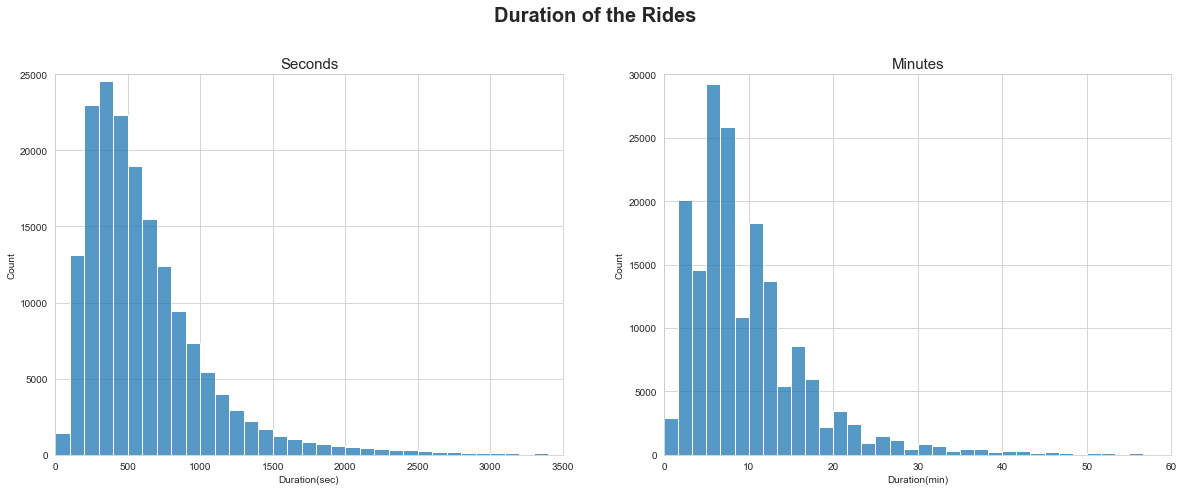

In [31]:
plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
bins_secs = np.arange(0,3500,100)
x_ticks = [0,500,1000,1500,2000,2500,3000,3500]
graph=sb.histplot(data=ford_polished,x='duration_sec',bins=bins_secs)
plt.title('Seconds',fontsize=15)
plt.xlabel('Duration(sec)')
plt.ylabel('Count')
plt.xticks(x_ticks,x_ticks)
plt.xlim(left=0,right=3500)
plt.ylim(top=25000)

plt.subplot(1,2,2)
bins_mins = bins_secs/60
graph=sb.histplot(data=ford_polished,x='duration_min',bins=bins_mins)
plt.title('Minutes',fontsize=15)
plt.xlabel('Duration(min)')
plt.ylabel('Count')
plt.xlim(left=0,right=60)
plt.ylim(top=30000)


plt.suptitle('Duration of the Rides',fontsize=20,fontweight='semibold',y=1.015);

This visuals shows that the data is highly concentrated in between 0 and 1000 seconds and it is skewly to the right and it is also unimodal around the 500 seconds mark or 10 minutes. This shows that most people who cycle spend 10 mins on a complete ride. How does this match up with the distance covered?
Because of the limitation of the dataset, Trips per month cannot be provided, Therefore, We move to check how many Trips were done during the weekdays.

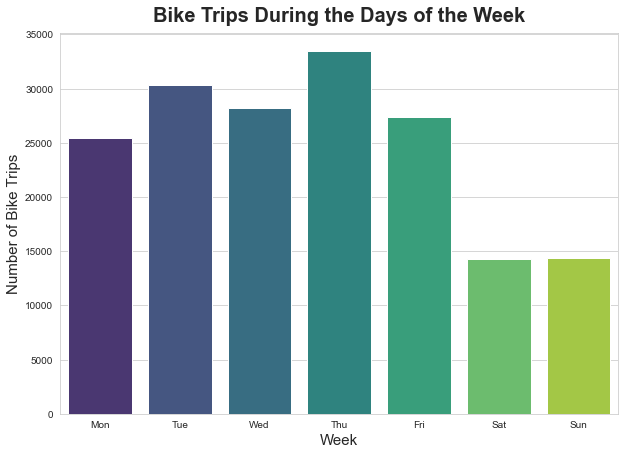

In [32]:
plt.figure(figsize=[10,7])
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sb.countplot(data=ford_polished,x='start_time_weekday',color=base_color,order=weekday,palette='viridis')
plt.xlabel('Week',fontsize=15)
plt.ylabel('Number of Bike Trips',fontsize=15)
plt.title('Bike Trips During the Days of the Week',fontsize=20,fontweight='semibold',y=1.015);

From the data visuals, it shows that the services of the FordGoBike system is mainly used during the weekdays and the most on Thursday. From observations, it looks like the service is mainly used by workers working during the weekdays. How can we know if this is used by the workforce?

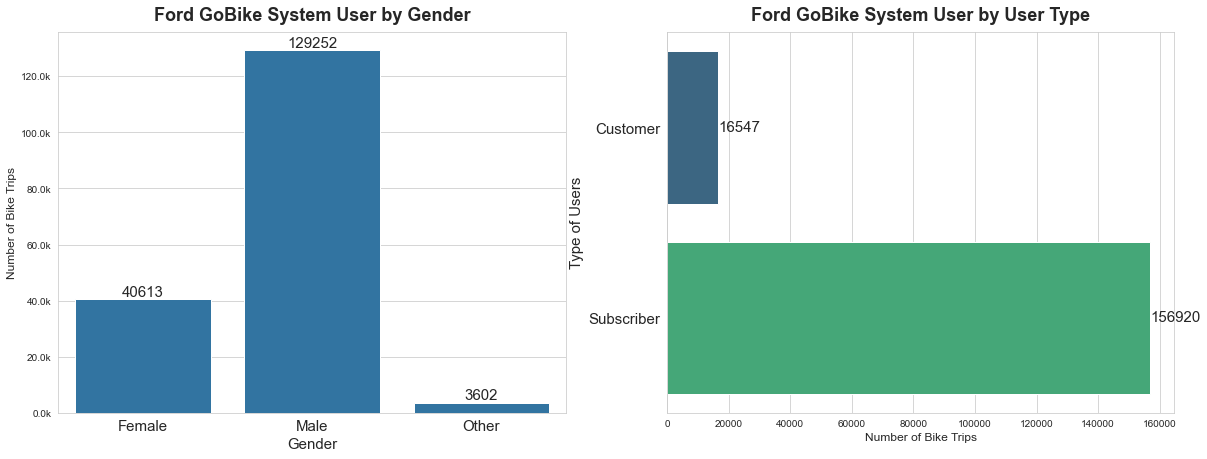

In [33]:
plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
ax= sb.countplot(data=ford_polished,x='member_gender',color=base_color)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=15);
y_ticks = np.arange(0,140000,20000)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Number of Bike Trips',fontsize=12)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(y_ticks,y_labels)
plt.title('Ford GoBike System User by Gender',fontsize=18,fontweight='semibold',y=1.015);

plt.subplot(1,2,2)
g = sb.countplot(data=ford_polished,y='user_type',color=base_color,palette='viridis')
g.bar_label(g.containers[0],fontsize=15)
plt.xlabel('Number of Bike Trips',fontsize=12)
plt.ylabel('Type of Users',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Ford GoBike System User by User Type',fontsize=18,fontweight='semibold',y=1.015);

From these Gender Image, It shows that majority of the users are Male which is 3 times that of the females. This data also includes other genders in the 21st century. We have already depicted that the system is used by people in the workforce, So why is the system male dominated? Is it because of better athleticism in men? or because of the male dominance in the workforce today?

From the User Type Image, Subscribers of the system make use of the Bikes more than the Users. Could this be because of constant registration, How hard it is to get a bike as a user or the response time of the company to regular users?

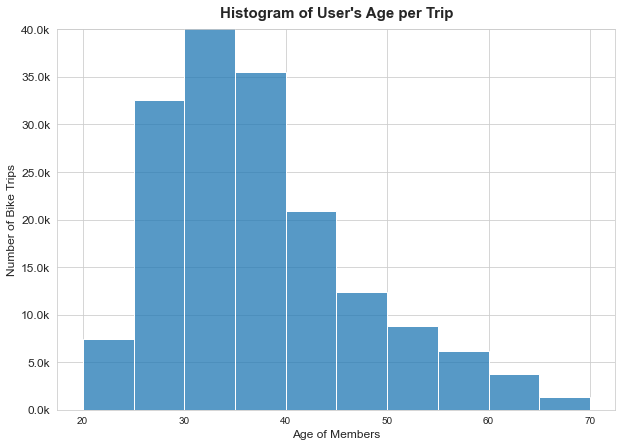

In [34]:
plt.figure(figsize=[10,7])

bins = np.arange(20,ford_polished['member_age'].max()+5,5)
y_ticks = np.arange(0,45000,5000)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
sb.histplot(data=ford_polished,x='member_age',bins=bins)
plt.xlabel('Age of Members',fontsize=12)
plt.ylabel('Number of Bike Trips',fontsize=12)
plt.yticks(y_ticks,y_labels,fontsize=12)
plt.title('Histogram of User\'s Age per Trip',fontsize=15,fontweight='semibold',y=1.015)
plt.ylim(top=40000);

From this image, The data is skewed to the right and it also stops at age 67 due to the outliers after such age. Majority of the users are mainly between 25 to 40 years of age and this is the average age of people in the workforce. This further confirms the assumption of the Usage of these bikes in the workforce of San Francisco. We can then further ask questions like Are they used for exercise in the morning or evening ?

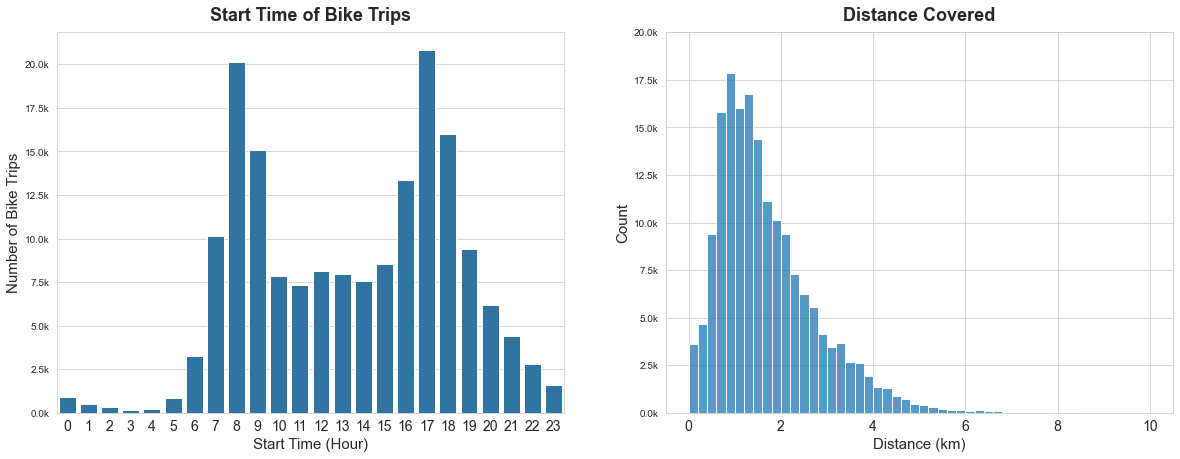

In [35]:
plt.figure(figsize=[20,7])


plt.subplot(1,2,1)
sb.countplot(data=ford_polished,x='start_time_hour',color=base_color)
y_ticks = np.arange(0,22500,2500)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
plt.xlabel('Start Time (Hour)',fontsize=15)
plt.ylabel('Number of Bike Trips',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(y_ticks,y_labels)
plt.title('Start Time of Bike Trips',fontsize=18,fontweight='semibold',y=1.015);


plt.subplot(1,2,2)
bins = np.arange(0,10+0.2,0.2)
sb.histplot(data=ford_polished,x='distance_km',bins=bins)
plt.xlabel('Distance (km)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(y_ticks,y_labels)
plt.title('Distance Covered',fontsize=18,fontweight='semibold',y=1.015);



From the figures above, The times when the trips start are concentrated mainly in between 8-9am and 4-6pm. Most people in the workforce work from 9-5pm. This shows that majority of the subscribers or Users use this bike to get to work or leave their workplace.
The second figure shows the distance covered by the users. The histogram is unimodal and skewed to the right. Most users do not use more than 2km on the bike before ending the trip. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Èach distribution has shown what the dataset entails. There have been a few outliers in the data but they were taking care of by reducing the limits of the plots affected by these outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

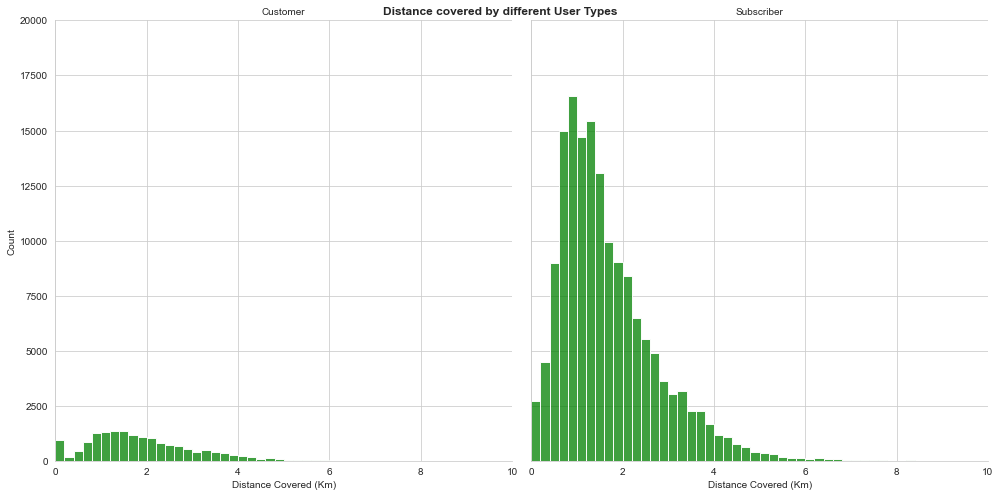

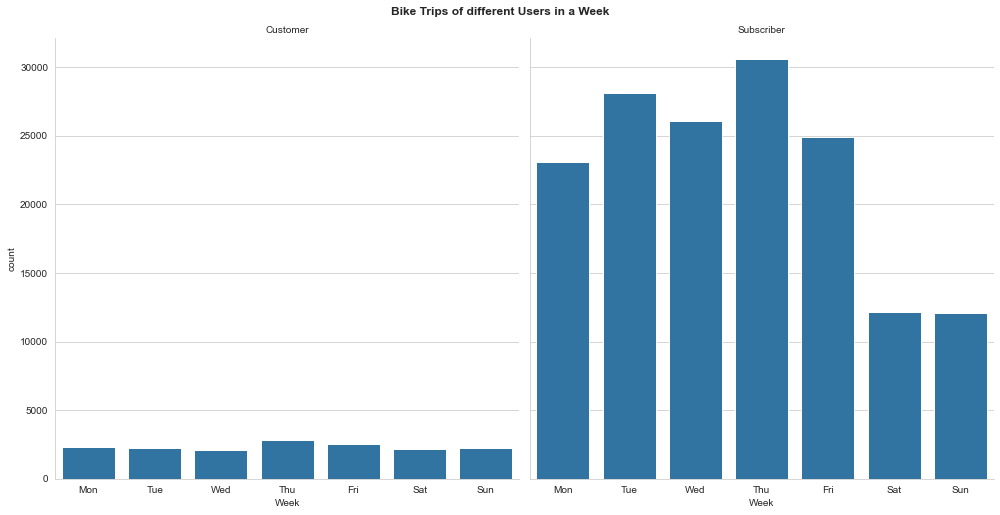

In [36]:
g = sb.FacetGrid(data=ford_polished,col='user_type',height=7,xlim=(0,10))
g.map(sb.histplot,'distance_km',color='g',bins=bins)
bins= np.arange(0,10+0.2,0.2)
g.set(xlabel=('Distance Covered (Km)'),ylim=(0,20000))
g.set_titles('{col_name}')
plt.suptitle('Distance covered by different User Types',fontweight='semibold')

m = sb.FacetGrid(data=ford_polished,col='user_type',height=7)
m.map(sb.countplot,'start_time_weekday',order=weekday)
m.set(xlabel=('Week'))
m.set_titles('{col_name}');
plt.suptitle('Bike Trips of different Users in a Week',fontsize=12,fontweight='semibold',y=1.015);

Both the Customer's and the Subscriber's distance covered are skewed to the right and majority of them take the bikes on 2km trip at most. This figures also shows the low usage of customers compared to th high usage of the subscribers. From the countplot, There is a large decrease from the weekdays to the weekends for the subscribers while there is an increase from Thursday for the customers. This figure shows that the customers might not be from the area. They might be tourist or students looking throught the city of San Francisco.

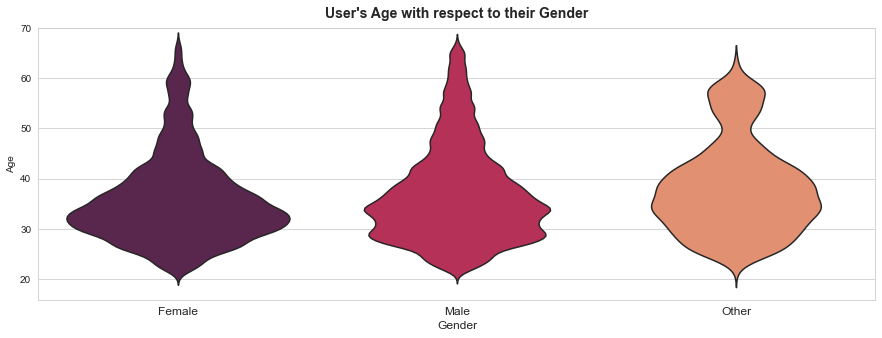

In [37]:
plt.figure(figsize=[15,5])
sb.violinplot(data=ford_polished,x='member_gender',y='member_age',inner=None,palette='rocket')
plt.xlabel('Gender',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Age')
plt.title("User's Age with respect to their Gender",fontsize=14,fontweight='semibold',y=1.015)
plt.ylim(top=70);

    From the violinplot above, it shows that majority of the female users are around the age of 31 on average, the male users are around 35 on average and the other genders also with a 35. Other genders dont have as much people between the ages of 48 and 52. Female and male also see a drastic drop around that age. This will be broken down further in future visualizations.

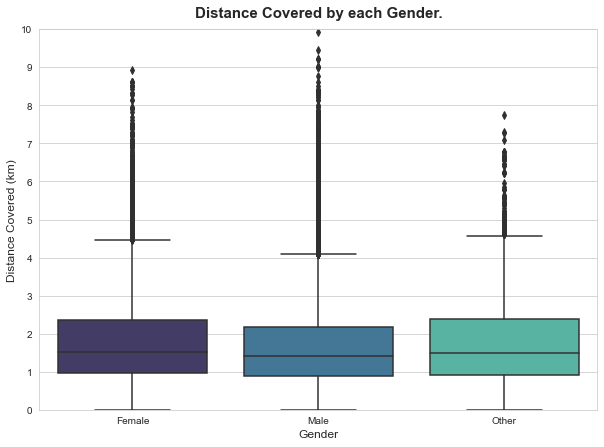

In [38]:
plt.figure(figsize=[10,7])
sb.boxplot(data=ford_polished,x='member_gender',y='distance_km',palette='mako')
plt.xlabel('Gender',fontsize=12)
y_ticks = np.arange(0,10+1,1)
plt.yticks(y_ticks,y_ticks);
plt.ylim((0,10))
plt.ylabel('Distance Covered (km)',fontsize=12)
plt.title('Distance Covered by each Gender.',fontsize=15,fontweight='semibold',y=1.015);

From this boxplot, we have females with the highest distance covered in average. Other genders has the highest distance covered from the lower quartile i.e 75 % of the gender covers the highest distance out of all the other ones. Male gender has the lowest number of distance covered. Why is it that the more athletic gender covers the least distance?

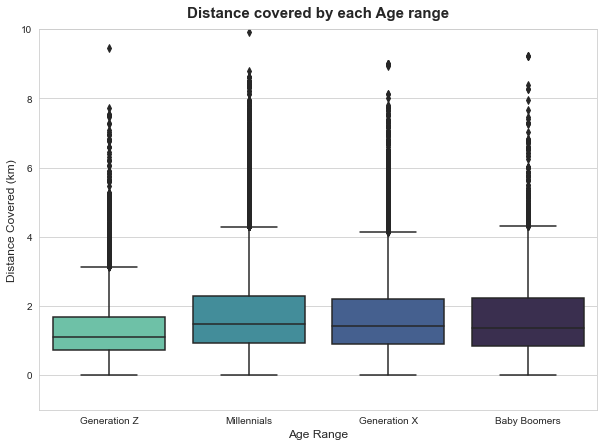

In [39]:
labels=['Generation Z','Millennials','Generation X','Baby Boomers']
bins = [10,25,41,57,76]
ford_polished['age_range'] = pd.cut(ford_polished['member_age'],bins=bins,labels=labels,include_lowest=True)

plt.figure(figsize=[10,7])
sb.boxplot(data=ford_polished,x='age_range',y='distance_km',palette='mako_r')
plt.ylim(top=10,bottom=-1)
plt.xlabel('Age Range',fontsize=12)
plt.ylabel('Distance Covered (km)',fontsize=12)
plt.title('Distance covered by each Age range',fontsize=15,fontweight='semibold',y=1.015);

A new column has been created to see the age range of the riders. From the box plot, the millenials have the highest average distance covered compared to the other age groups. This may be as a result of the commuters mainly going to work. In a close second is the Generation X(42-56) who are also in the workforce but closer to retirement than the Millenials. The Baby Boomers(57-76) also cover a huge amount of distance from the lower quartile range. This may be from daily exercises because they'd rather use a bike than a car. Why is it that the Generation Z (18-25) has a lower distance covered compared to the other age groups?

C:\Users\HP\Desktop\sample_project\env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


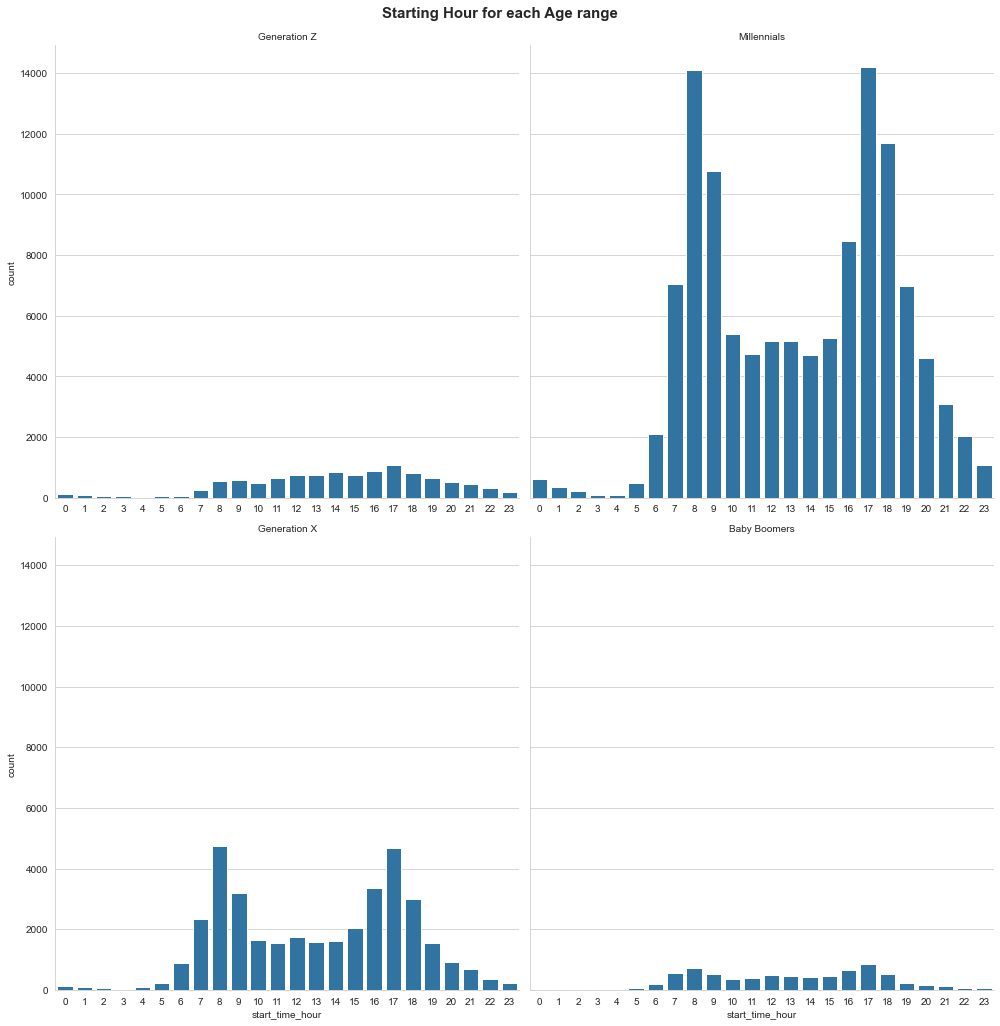

In [40]:
g=sb.FacetGrid(data=ford_polished,col='age_range',col_wrap=2,height=7,sharex=False)
g.map(sb.countplot,'start_time_hour')
g.set_titles('{col_name}')
plt.suptitle('Starting Hour for each Age range',fontsize=15,fontweight='semibold',y=1.015);

From these countplots, all the age groups except for the Gen Z majorly use the bike between 8-9am and 4-6am. The time is partially uniformly disrtibuted between 8am - 11pm. Is this because of majority of Gen Z that are not in the workforce?

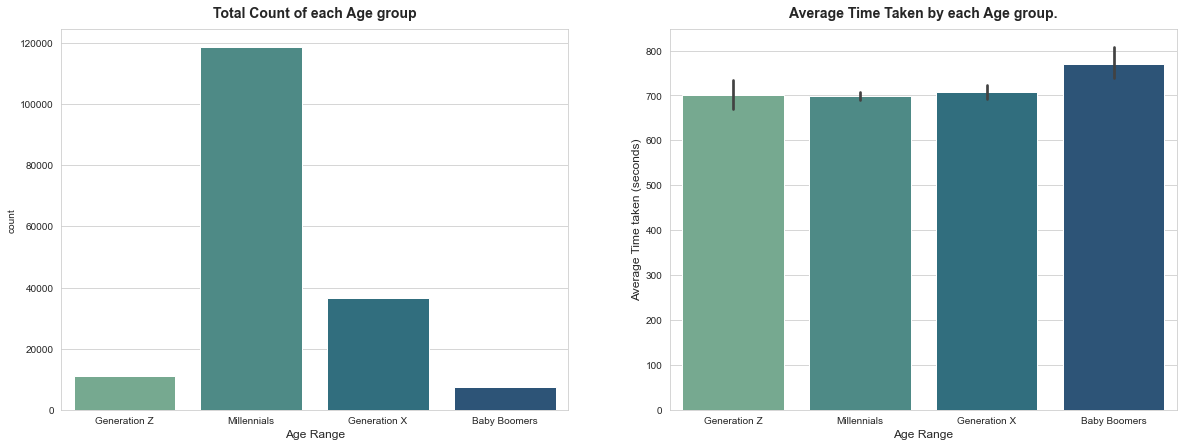

In [41]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sb.countplot(data=ford_polished,x='age_range',palette='crest')
plt.xlabel('Age Range',fontsize=12)
plt.title('Total Count of each Age group',fontsize=14,fontweight='semibold',y=1.015)

plt.subplot(1,2,2)
sb.barplot(data=ford_polished,x='age_range',y='duration_sec',palette='crest');
plt.xlabel('Age Range',fontsize=12)
plt.ylabel('Average Time taken (seconds)',fontsize=12)
plt.title('Average Time Taken by each Age group.',fontsize=14,fontweight='semibold',y=1.015);


    This figures show the count of the age group and its average duration to their destination. The averages are quite close but the error lines tell a different tale. the error lines of Gen Z and baby boomers is high due to the their low count in the dataset but that of Millenials and Generation X are Vice versa. On average it takes them 700 seconds(~12 minutes) to cover a distance of 1.7 kilometers.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship of the Distance Covered and the Duration with other features were the standouts. It showed that people covered a great distance with the bikes without wasting the time of Customers or the Subscribers. We were also able to see the relation with several age groups with millenials being the ones with the most distance covered and with most time spent on the service.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed the count of rider per day in respect to the User types. Most Subscribers use their bike rides between Monday to Friday while the Customers have a low spread through out the week and it brought the assumption of customers being tourists or people out of town trying to navigate the Bay Area.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [42]:
# Frequency of Each Ride
ford_polished['freq'] = 1

In [43]:
piv = pd.pivot_table(ford_polished, values="distance_km",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)
freq = pd.pivot_table(ford_polished, values="freq",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)

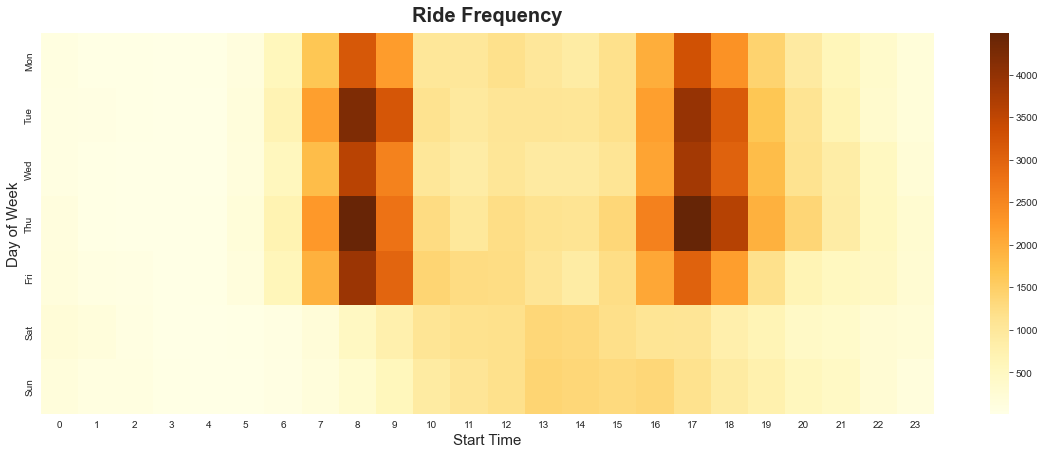

In [44]:
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(freq,fmt='d',ax=ax,cmap='YlOrBr')
plt.title('Ride Frequency',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

This review starts with a look at the frequency of the rides on each day at their respective times. As we can see from the heatmap, Majority of the rides comes from the weekdays between 7-9am and 4-6pm. This further proves the assumption made on this commute being used by people from the 9-5 line of work. 

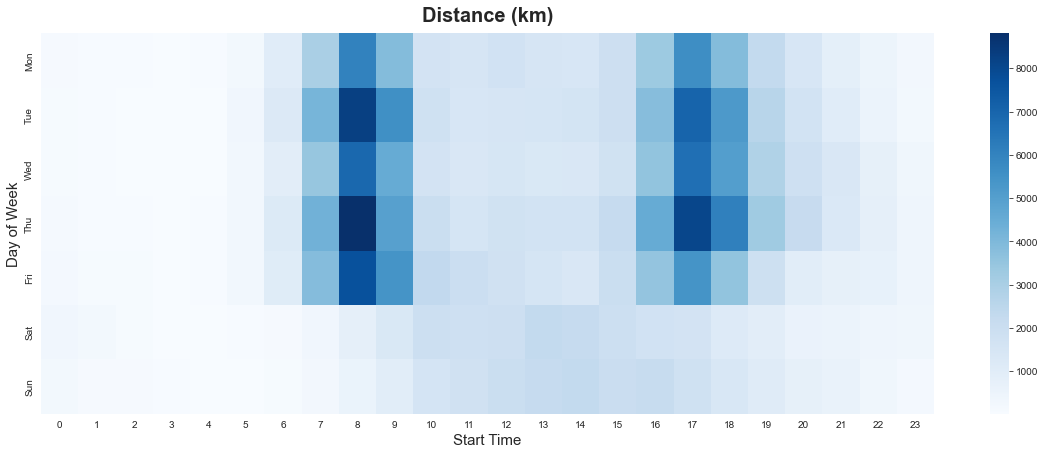

In [45]:
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(piv,fmt='d',ax=ax,cmap='Blues')
plt.title('Distance (km)',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

We review the distance taken also each day at respective starting times. Due to the amount of rides starting at the 9-5 times, The distance also reflects that. Around 7-9am, it covers betwen 5000 to 8000 km per day. This data can improve the efficiency of the service by adding more bikes at these times to raise their profits.

In [46]:
# Minutes of Rides from 30 minutes and below to remove outliers
data = ford_polished.query('duration_min < 30')

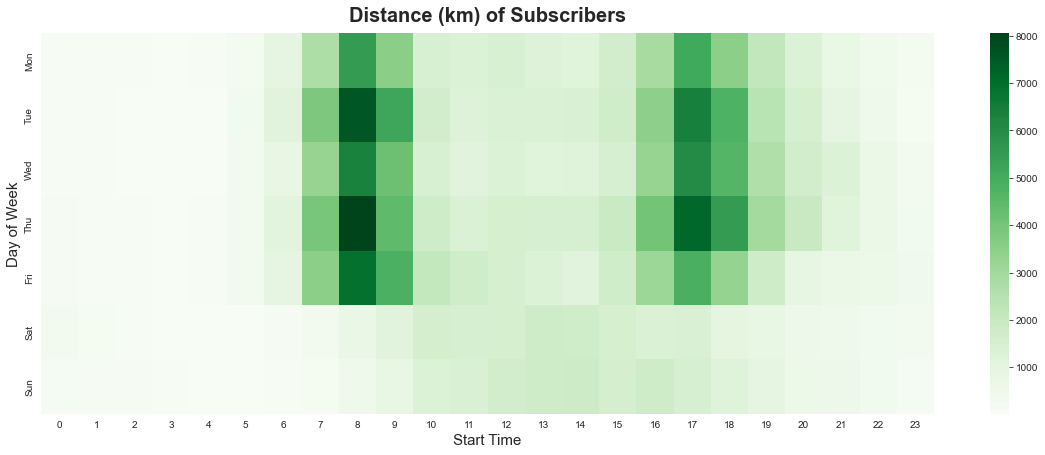

In [47]:
# Minutes of Rides from 30 minutes and below to remove outliers
data = ford_polished.query('duration_min < 30')
data_subscriber = ford_polished.query('user_type == "Subscriber"')
data_subscriber=  pd.pivot_table(data_subscriber, values="distance_km",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(data_subscriber,ax=ax,cmap='Greens')
plt.title('Distance (km) of Subscribers',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

In this figure, We reduce the data to 30 minutes and below per ride to reduce the number of outliers in the data to be able to communicate the findings at an average level. We then look into the distance of the user types in the dataset.Firstly, the subscribers are being analysed and as we have noticed throughout the investigation,**They use this commute majorly at the start of the weekday from 7am to 9am and 4pm to 6pm peaking on Thursday at 5pm till the end of the weekday** which shows that most of the subscribers are people on the daily grind. Lastly, the cutsomers; From their heatmap, **it also fall between that line of a 9-5 but there also a bit of movement between 10am to 5pm on the weekends, peaking on Saturday around 1pm.** From this analysis, customers might still fall in the line of the 9-5 jobs but tourists are also involved in the business.

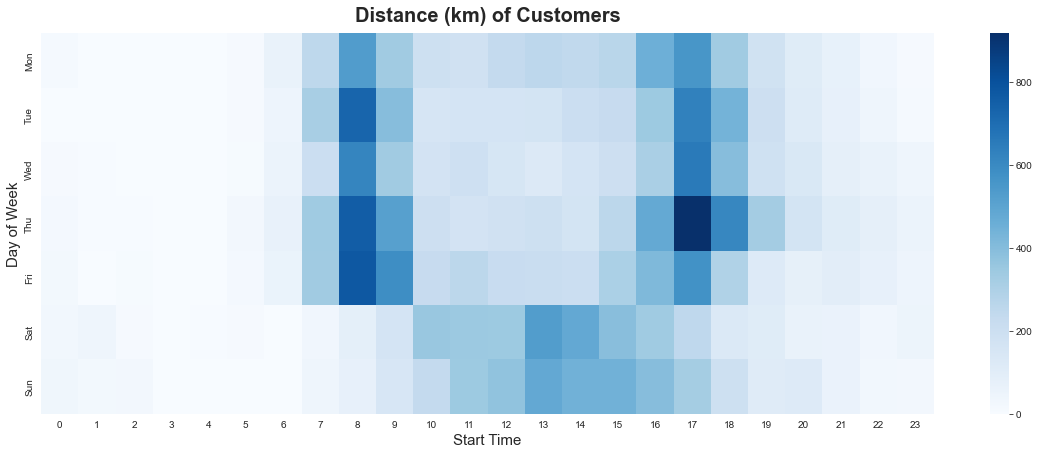

In [48]:
data_customer = ford_polished.query('user_type == "Customer"')
data_customer=  pd.pivot_table(data_customer, values="distance_km",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(data_customer,ax=ax,cmap='Blues')
plt.title('Distance (km) of Customers',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

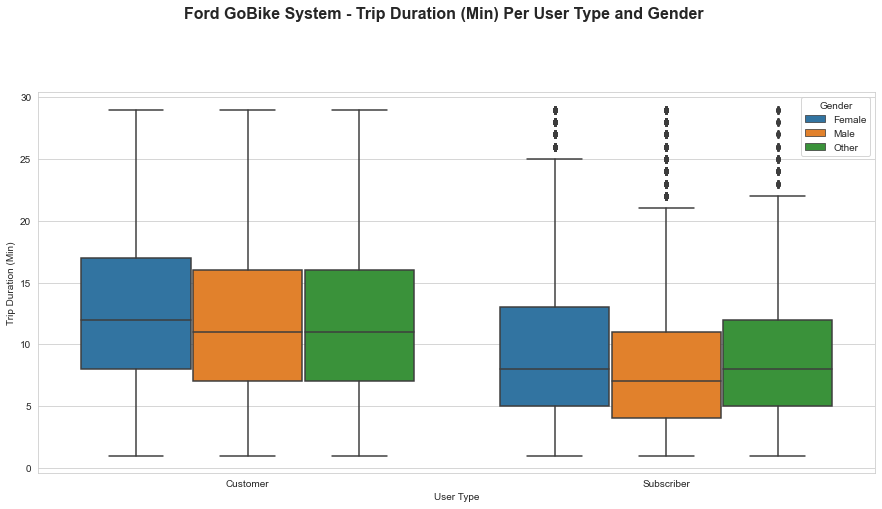

In [49]:
f,ax = plt.subplots(figsize=[15,7])
graph = sb.boxplot(data=data,x='user_type',y='duration_min',hue='member_gender')
graph.set(xlabel = "User Type",ylabel=  "Trip Duration (Min)")
graph.legend_.set_title('Gender')
graph.figure.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

(0.0, 8.0)

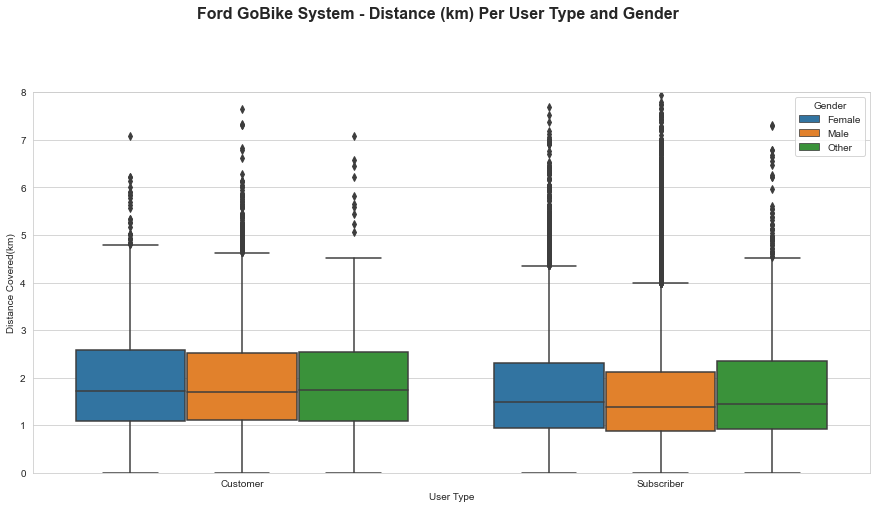

In [50]:
f,ax = plt.subplots(figsize=[15,7])
graph = sb.boxplot(data=data,x='user_type',y='distance_km',hue='member_gender')
graph.set(xlabel = "User Type",ylabel=  "Distance Covered(km)")
graph.legend_.set_title('Gender')
graph.figure.suptitle('Ford GoBike System - Distance (km) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
plt.ylim(0,8)

After analysing the distance of the customers and subscribers per day, We take a look at the average Trip Duration of Genders of each user type. On the Customer type, Female riders take a longer time(\~13 minutes) than the other genders (\~11 minutes) on roughly the same distance (\~1.8km). On the subscriber type, Female and the Other gender take the same time (\~8 minutes) which is longer than the male's time (\~7 minutes) roughly on the same distance as well (\~1.6km). 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed the relationship of the Start time and the Days of the Week which helped in revealing when rides are taken per week and also between the Customers and Subscribers. Distance and duration also strentened each other in looking through the Genders of the User types which help see the difference in athletic ability between the male and female.
### Were there any interesting or surprising interactions between features?

> There was no standout interaction because most were captured in previous Explorations but this cemented the asssumptions made in the previous ones and made the visuals better than the univariate and the bivariate.

## Conclusions
>In the race between vehicles and trains, this project is a wise choice. Here are some of its advantages: 
>
>* Environmentally sustainable, cost-effective, and lifestyle-friendly.
>* Subscribers, or daily commuters, gain from a healthy transportation option.
>* Customers (such as visitors, students, etc.) have a flexible yet environmentally friendly alternative for exploring the city.
>* Accessible and affordable transit for all socioeconomic groups